In [40]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

In [41]:
#load train data
train_data = pd.read_csv('../data/train.csv')

In [42]:
#call info method to see data summary
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
#print first several rows of the data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
#convert YrSold column to datetime
train_data['YrSold'] = pd.to_datetime(train_data['YrSold'].astype(str), format='%Y')
train_data['YearBuilt'] = pd.to_datetime(train_data['YearBuilt'].astype(str), format='%Y')
train_data['YearRemodAdd'] = pd.to_datetime(train_data['YearRemodAdd'].astype(str), format='%Y')

In [45]:
mean_price = train_data["SalePrice"].mean()
print(mean_price)
train_data[train_data.SalePrice == 180000].T

180921.19589041095


,66,111,120,134,248,744,902,1055,1146,1281
Id,67,112,121,135,249,745,903,1056,1147,1282
MSSubClass,20,80,80,20,60,120,60,20,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RL,RL
LotFrontage,NaN,NaN,NaN,78.0,72.0,41.0,63.0,104.0,NaN,50.0
LotArea,19900,7750,21453,10335,11317,5395,7875,11361,11200,8049
...,...,...,...,...,...,...,...,...,...,...
MoSold,7,4,10,7,9,10,7,5,5,7
YrSold,2010-01-01 00:00:00,2010-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,2006-01-01 00:00:00,2006-01-01 00:00:00
SaleType,WD,WD,WD,WD,WD,WD,WD,COD,WD,WD
SaleCondition,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Abnorml,Normal,Normal


In [46]:
#inspect the number of missing values
missing = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


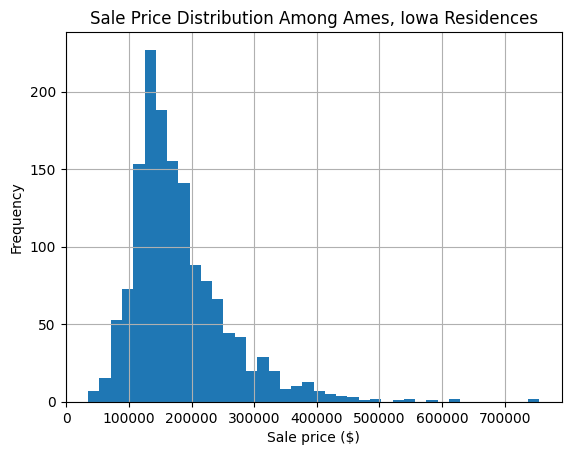

In [47]:
#sale price distribution
train_data['SalePrice'].hist(bins=40)
plt.title("Sale Price Distribution Among Ames, Iowa Residences")
plt.xlabel("Sale price ($)")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Sale price ($)')

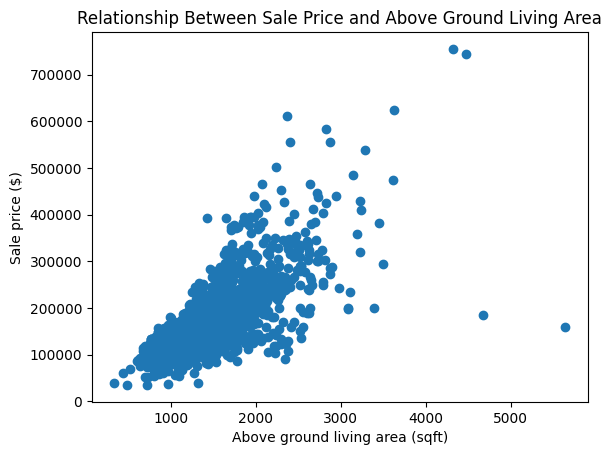

In [48]:
#sale price vs. indoor square footage
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'])
plt.title("Relationship Between Sale Price and Above Ground Living Area")
plt.xlabel('Above ground living area (sqft)')
plt.ylabel('Sale price ($)')

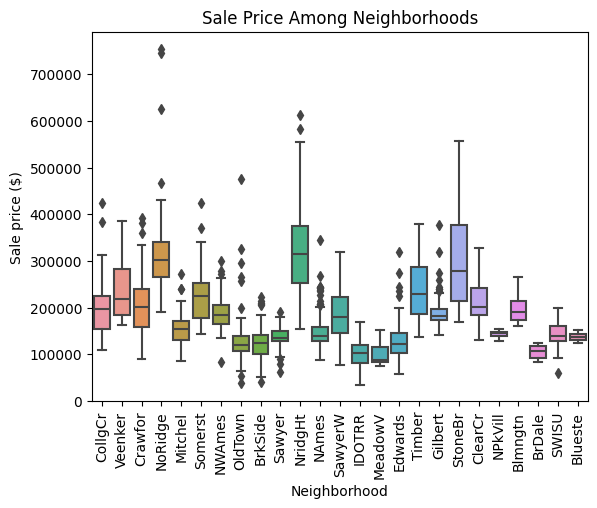

In [49]:
#sale price vs. neighborhood
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.title('Sale Price Among Neighborhoods')
plt.ylabel("Sale price ($)")
plt.xticks(rotation=90)
plt.show()

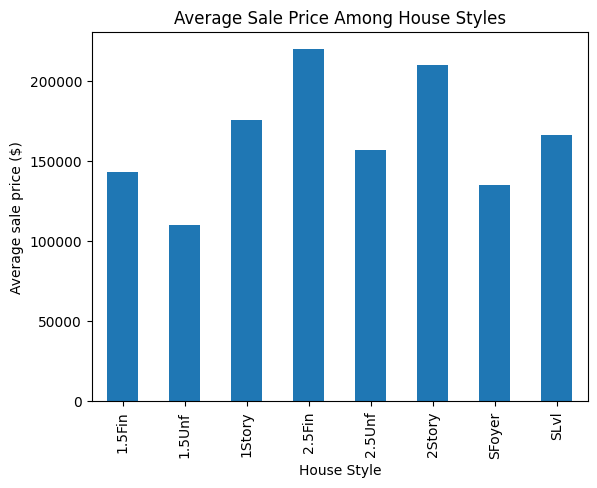

In [50]:
#inspecting relationship between sale prices and house styles
train_data.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')
plt.title('Average Sale Price Among House Styles')
plt.xlabel('House Style')
plt.ylabel('Average sale price ($)')
plt.show()

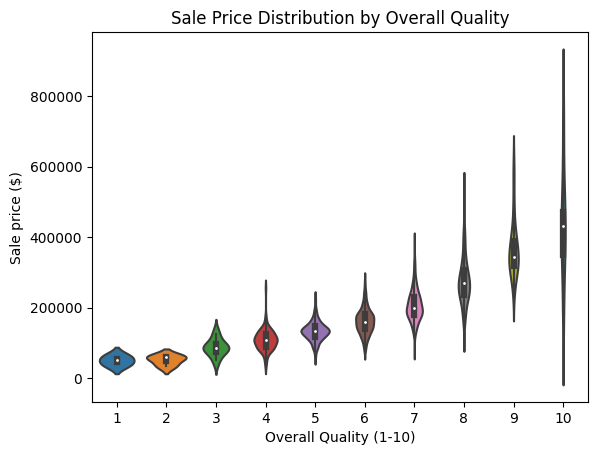

In [51]:
#violin plotting sale price against overall quality
sns.violinplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Sale Price Distribution by Overall Quality')
plt.ylabel('Sale price ($)')
plt.xlabel("Overall Quality (1-10)")
plt.show()

In [52]:
#search for homogenous columns
## homogenous columns seem to display 2 rather than 1
homogenous_columns = train_data.nunique()
homogenous_columns = homogenous_columns[homogenous_columns == 2].index.tolist()
print(homogenous_columns)

['Street', 'Alley', 'Utilities', 'CentralAir']


Among these columns, Street and Utilities are homogenous. We also know that the column PoolQC is heavily underreported, therefore lacking any utility in explaining the variance in sale prices. Street, Utilities, and PoolQC can be removed from the training data.

In [53]:
#remove columns from train_data
train_data.drop(columns=['Street', 'Utilities', 'PoolQC'], inplace=True)

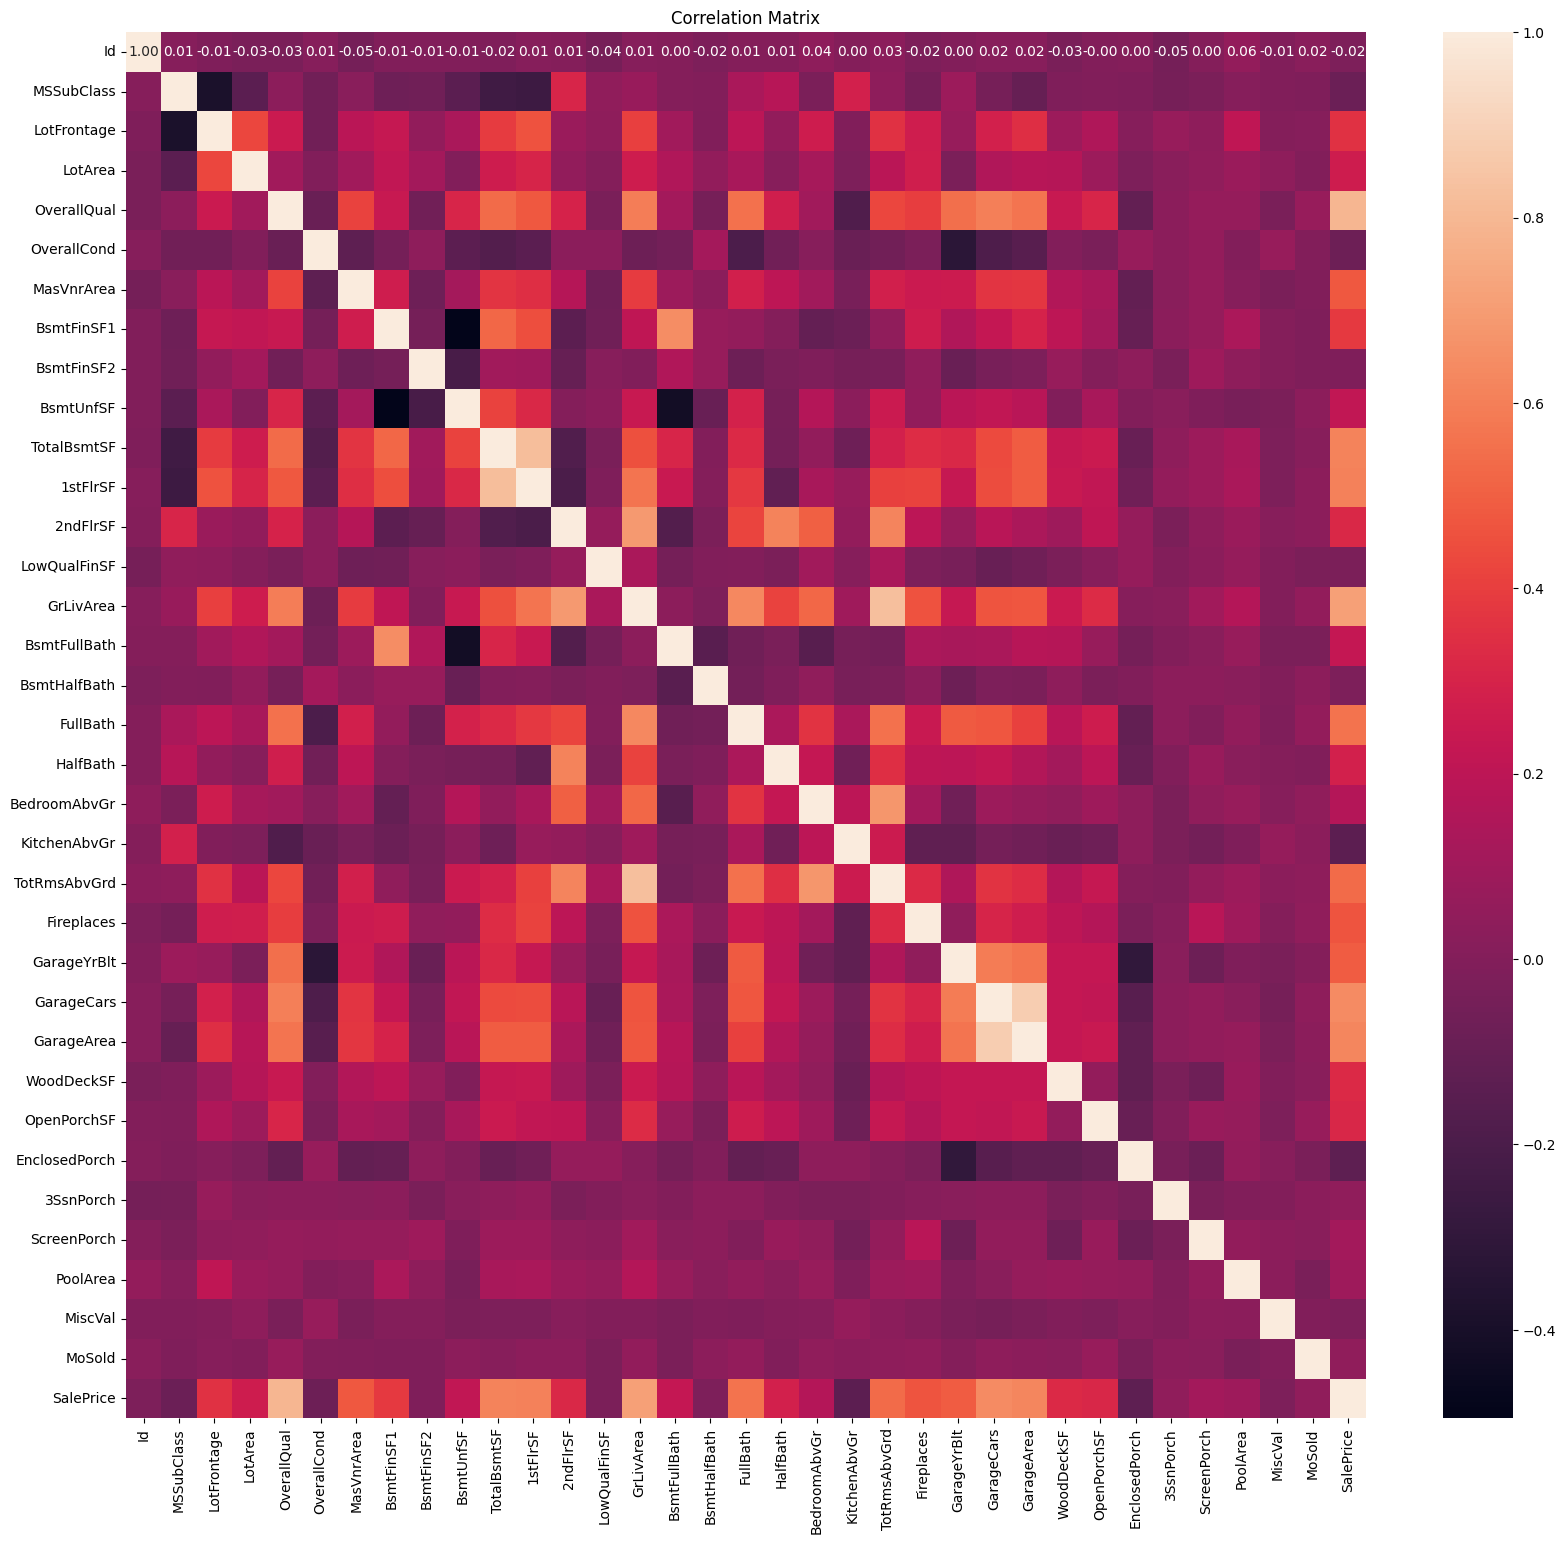

In [54]:
#inspecting correlations of numerical features and heatmapping
corr_mat = train_data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [55]:
#fill in missing LotFrontage values with median
median_lotfrontage = train_data['LotFrontage'].median()
train_data['LotFrontage'].fillna(median_lotfrontage, inplace=True)

C:\Users\aless\AppData\Local\Temp\ipykernel_17692\1227467394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LotFrontage'].fillna(median_lotfrontage, inplace=True)


In [56]:
#save data
train_data.shape

(1460, 78)

In [57]:
#save data to new csv file
datapath = '../data'
file_name = 'cleaned_train.csv'
file_path = os.path.join(datapath, file_name)
train_data.to_csv(file_path, index=False)

In [58]:
#normalizing, scaling, and encoding will be done to the data in the EDA stage